In [1]:
dataset = "colon"
n_shot = 1
config = f"../configs/swin-b_vpt/{n_shot}-shot_{dataset}.py"

In [2]:
import matplotlib.pyplot as plt
import os
import cv2

from mmengine.config import Config
from mmengine.runner import Runner

In [3]:
cfg = Config.fromfile(config)

In [4]:
# fix paths in train_dataloader
cfg.train_dataloader.dataset.data_prefix = cfg.train_dataloader.dataset.data_prefix.replace("/scratch/medfm/medfm-challenge", "..")
cfg.train_dataloader.dataset.ann_file = os.path.join("..", cfg.train_dataloader.dataset.ann_file)
# set batch_size to 1
cfg.train_dataloader.batch_size = 1
cfg.train_dataloader.sampler.shuffle = False

In [5]:
# get train dataset from config
data_prefix = cfg.train_dataloader.dataset.data_prefix
ann_file = cfg.train_dataloader.dataset.ann_file
data_prefix, ann_file

('../data/MedFMC_train/colon/images',
 '..\\data_anns/MedFMC/colon/colon_1-shot_train_exp1.txt')

In [6]:
runner = Runner.from_cfg(cfg)

08/25 14:52:08 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
    CUDA available: False
    numpy_random_seed: 1848920262
    MSVC: n/a, reason: fileno
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=11.7, CUDNN_VERSION=8.5.0, CXX_COMPILER=C:/actions-runner/_work/pytorch/pytorch/builder/windows/tmp_bin/sccache-cl.exe, CXX_FLAGS=/DWIN32 /D_WINDOWS /GR /EHsc /w /bigobj /FS -DUSE_PTHREADPOOL -DNDEBU

In [26]:
# load image paths from txt ann_file to list and remove labels
with open(ann_file, "r") as f:
    lines = f.readlines()
    image_files = [line[:-3] for line in lines]

In [24]:
len(image_files)

30

In [25]:
os.path.join(data_prefix, image_files[0])

'../data/MedFMC_train/colon/images\\1903326001_2019-06-11 12_07_06-lv1-3173-23728-2837-3546p0008.png '

In [21]:
img = cv2.imread(os.path.join(data_prefix, image_files[0]))
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

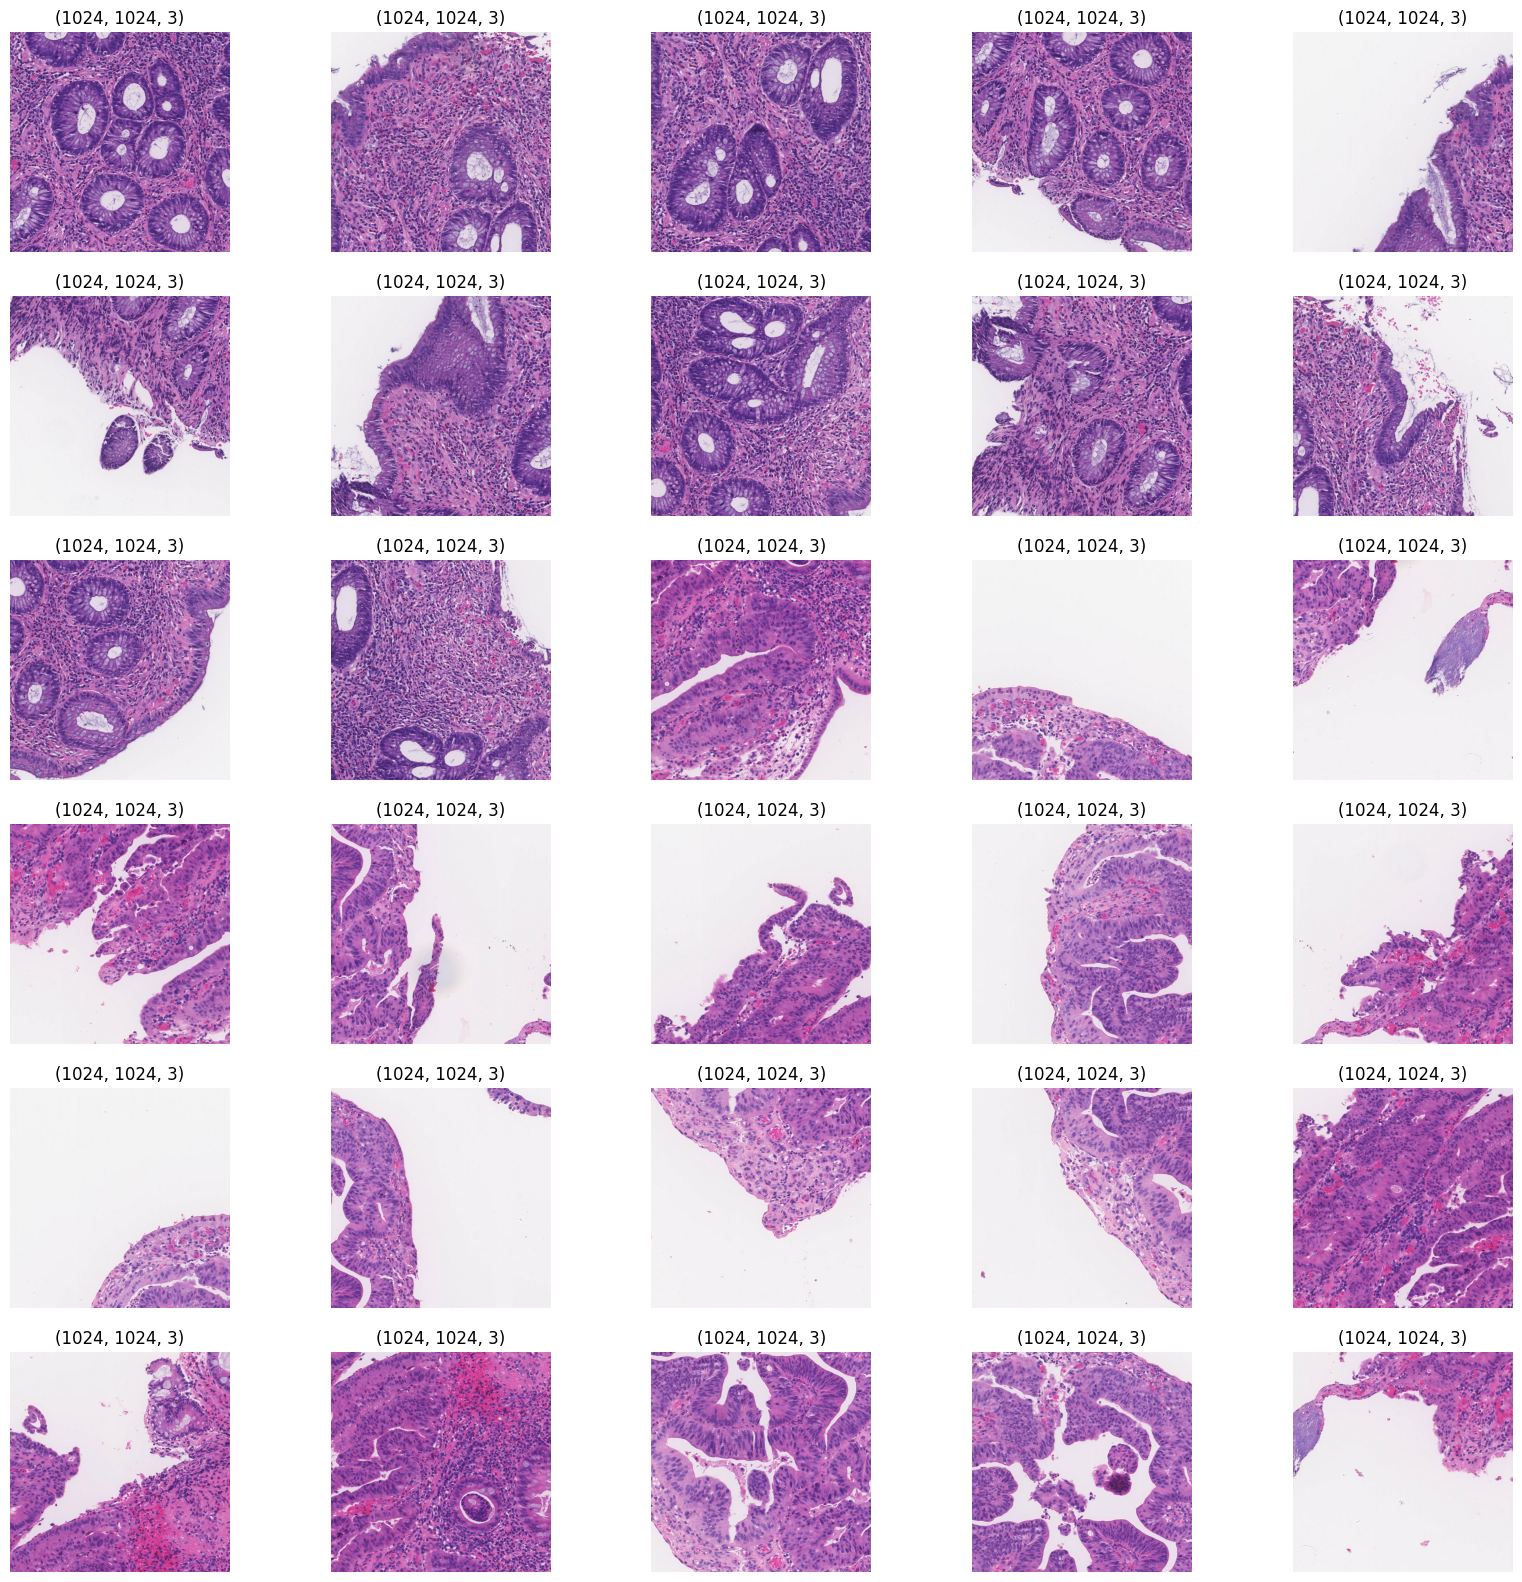

In [30]:
# plot 30 images from dataset in a 6 x 5 subplot in color, change from bgr to rgb first
# add filename and resolution as title
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
for i, img_path in enumerate(image_files):
    # load image as bgr
    img = cv2.imread(os.path.join(data_prefix, img_path))
    # convert to rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # get image title
    title = os.path.basename(img_path)
    ax = axs[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(f"{img.shape}")
    ax.axis("off")
    if (i+1) % 30 == 0:
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

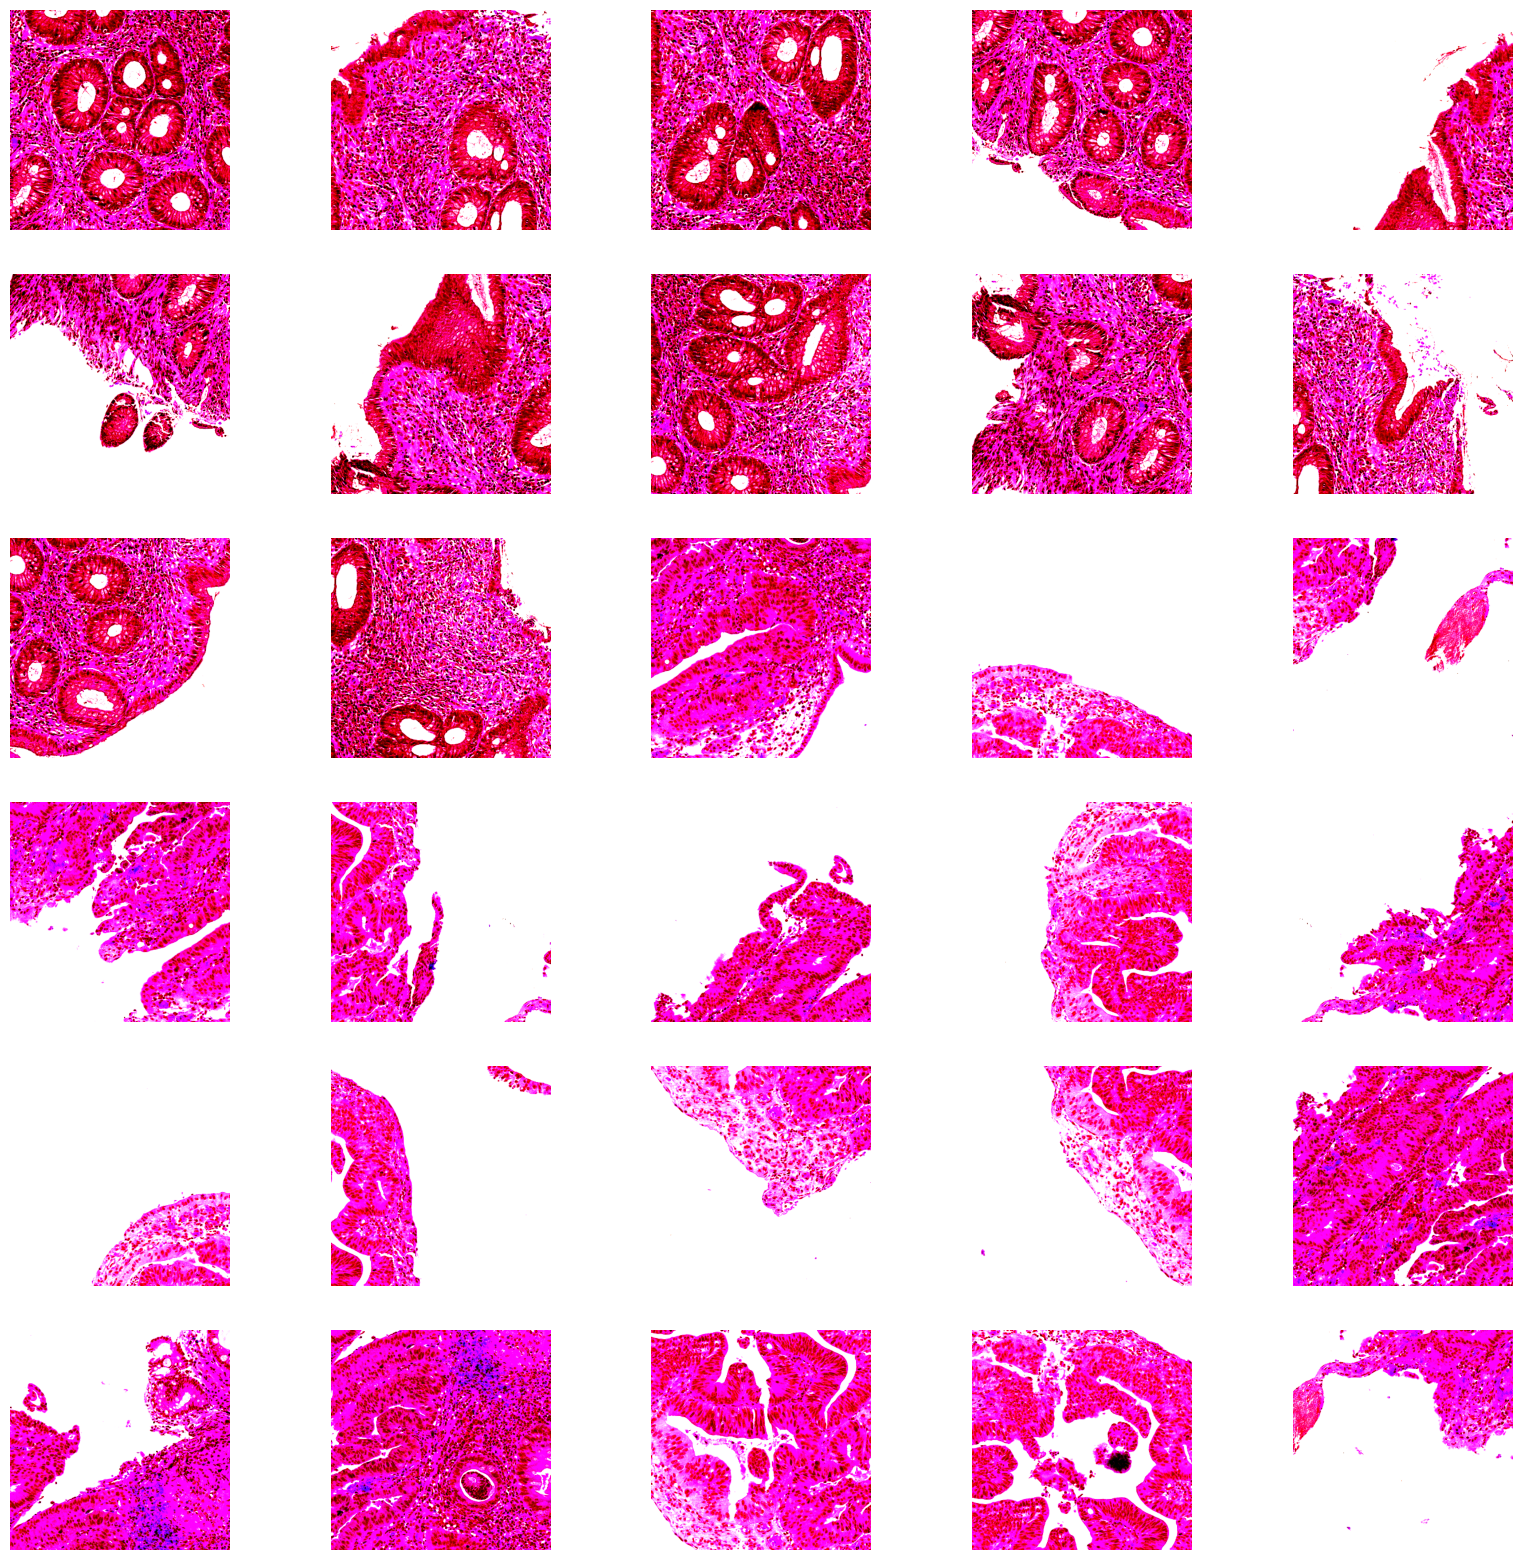

In [32]:
# display augmented images using the dataloader from the runner.train_dataloader
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
for i, batch in enumerate(runner.train_dataloader):
    # get image from batch and convert from tensor to numpy
    img = batch["inputs"][0].numpy()
    # swap axes to get img to channels last
    img = img.transpose(1, 2, 0)
    # get image title
    title = os.path.basename(batch["data_samples"][0].img_path)
    ax = axs[i // 5, i % 5]
    ax.imshow(img)
    #ax.set_title(f"{title}\n{img.shape}")
    ax.axis("off")
    if (i+1) % 30 == 0:
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

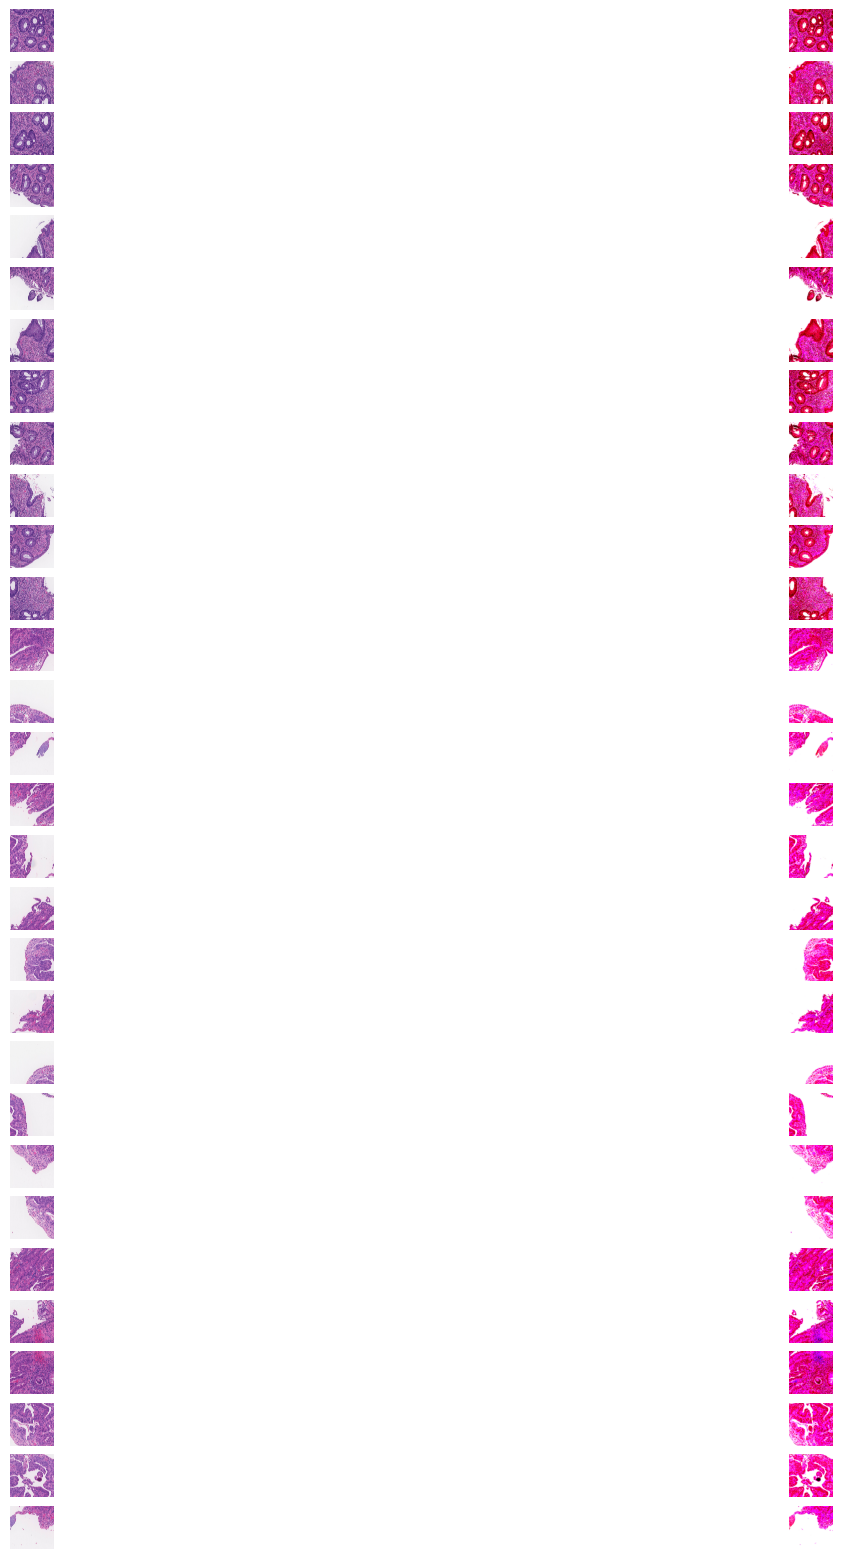

In [33]:
# plot the unaugmented image files and the augmented images from the dataloader given by the cfg side by side, one image pair per row
dataset_size = 30
fig, axs = plt.subplots(dataset_size, 2, figsize=(20, 20))
for i, img_path in enumerate(image_files):
    # load image as grayscale
    img = cv2.imread(os.path.join(data_prefix, img_path))
    # convert to rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # get image title
    title = os.path.basename(img_path)
    ax = axs[i, 0]
    ax.imshow(img, cmap="gray")
    #ax.set_title(f"{title}\n{img.shape}")
    ax.axis("off")
    if (i + 1) % dataset_size == 0:
        break

for i, batch in enumerate(runner.train_dataloader):
    # get image from batch and convert from tensor to numpy
    img = batch["inputs"][0].numpy()
    # swap axes to get img to channels last
    img = img.transpose(1, 2, 0)
    # get image title
    title = os.path.basename(batch["data_samples"][0].img_path)
    ax = axs[i, 1]
    ax.imshow(img)
    #ax.set_title(f"{title}\n{img.shape}")
    ax.axis("off")
    if (i + 1) % dataset_size == 0:
        break

plt.subplots_adjust(wspace=0.01)
